In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 출력 설정
pd.set_option('display.max_columns', None)

print("✅ 라이브러리 임포트 완료!")

✅ 라이브러리 임포트 완료!


In [2]:
# 데이터 로드
df = pd.read_csv('../data/hotel_bookings.csv')

# 기본 정보
print(f"📊 데이터 크기: {df.shape[0]:,}행 × {df.shape[1]}열\n")
print("=" * 50)
print("\n📋 컬럼 정보:")
df.info()

📊 데이터 크기: 119,390행 × 32열


📋 컬럼 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non

In [3]:
# 처음 5행 확인
print("📌 데이터 샘플:\n")
df.head()

📌 데이터 샘플:



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# 기초 통계
print("📈 기초 통계:\n")
df.describe()

📈 기초 통계:



,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
# 결측치 확인
print("❓ 결측치 현황:\n")
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

❓ 결측치 현황:



company     112593
agent        16340
country        488
children         4
dtype: int64

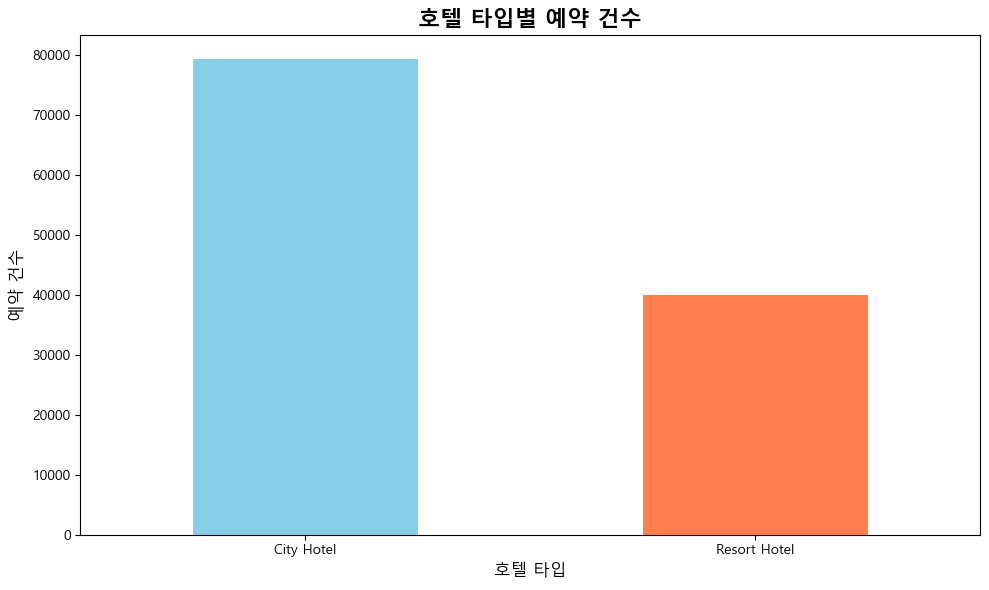

In [6]:
# 호텔 타입별 예약 건수
plt.figure(figsize=(10, 6))
df['hotel'].value_counts().plot(kind='bar', color=['skyblue', 'coral'])
plt.title('호텔 타입별 예약 건수', fontsize=16, fontweight='bold')
plt.xlabel('호텔 타입', fontsize=12)
plt.ylabel('예약 건수', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

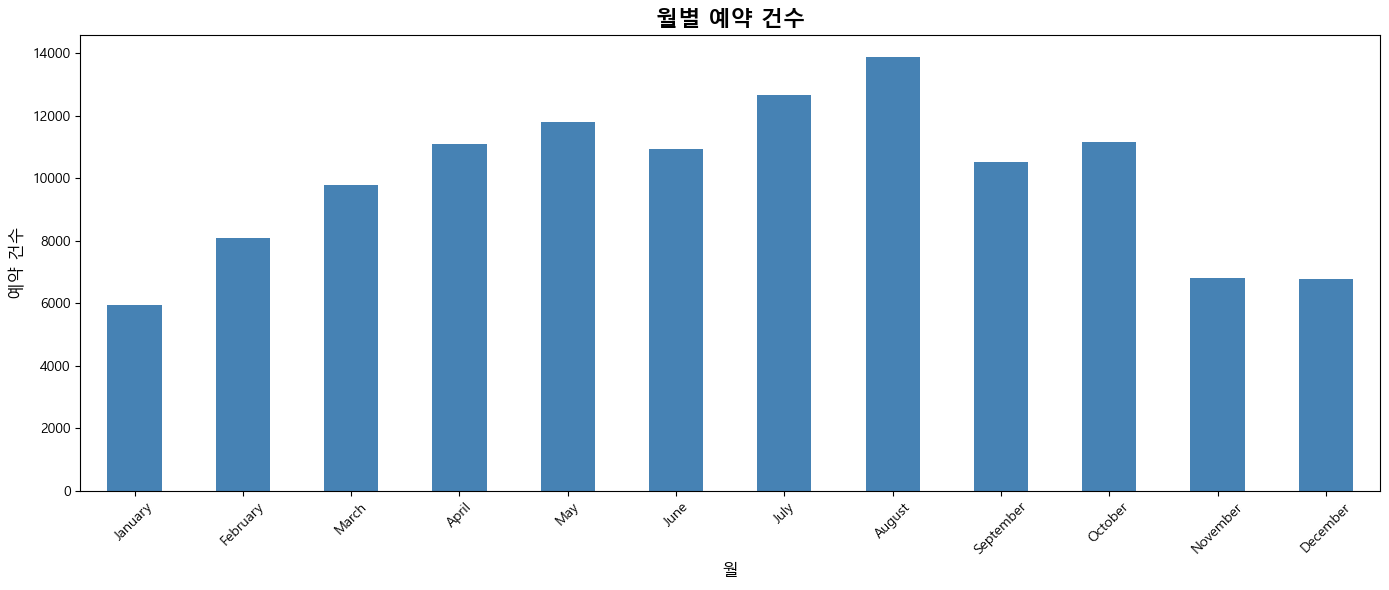

In [7]:
# 월별 예약 추이
plt.figure(figsize=(14, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly = df['arrival_date_month'].value_counts().reindex(month_order)
monthly.plot(kind='bar', color='steelblue')
plt.title('월별 예약 건수', fontsize=16, fontweight='bold')
plt.xlabel('월', fontsize=12)
plt.ylabel('예약 건수', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# 취소되지 않은 예약만 선택
df_valid = df[df['is_canceled'] == 0].copy()

print(f"✅ 전체 예약: {len(df):,}건")
print(f"✅ 유효 예약: {len(df_valid):,}건")
print(f"❌ 취소 예약: {len(df) - len(df_valid):,}건")

✅ 전체 예약: 119,390건
✅ 유효 예약: 75,166건
❌ 취소 예약: 44,224건


In [9]:
# 날짜 컬럼 생성
df_valid['arrival_date'] = pd.to_datetime(
    df_valid['arrival_date_year'].astype(str) + '-' + 
    df_valid['arrival_date_month'] + '-' + 
    df_valid['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d',
    errors='coerce'
)

# 결측치 제거
df_valid = df_valid.dropna(subset=['arrival_date'])

print(f"✅ 날짜 변환 완료: {len(df_valid):,}건")
df_valid[['arrival_date', 'hotel', 'adults']].head()

✅ 날짜 변환 완료: 75,166건


,arrival_date,hotel,adults
0,2015-07-01,Resort Hotel,2
1,2015-07-01,Resort Hotel,2
2,2015-07-01,Resort Hotel,1
3,2015-07-01,Resort Hotel,1
4,2015-07-01,Resort Hotel,2


In [10]:
# 일별 예약 집계
daily_bookings = df_valid.groupby('arrival_date').size().reset_index()
daily_bookings.columns = ['date', 'bookings']

# 날짜 순 정렬
daily_bookings = daily_bookings.sort_values('date').reset_index(drop=True)

print(f"✅ 일별 집계 완료: {len(daily_bookings)}일")
daily_bookings.head(10)

✅ 일별 집계 완료: 793일


,date,bookings
0,2015-07-01,103
1,2015-07-02,36
2,2015-07-03,37
3,2015-07-04,45
4,2015-07-05,37
5,2015-07-06,41
6,2015-07-07,29
7,2015-07-08,45
8,2015-07-09,29
9,2015-07-10,42


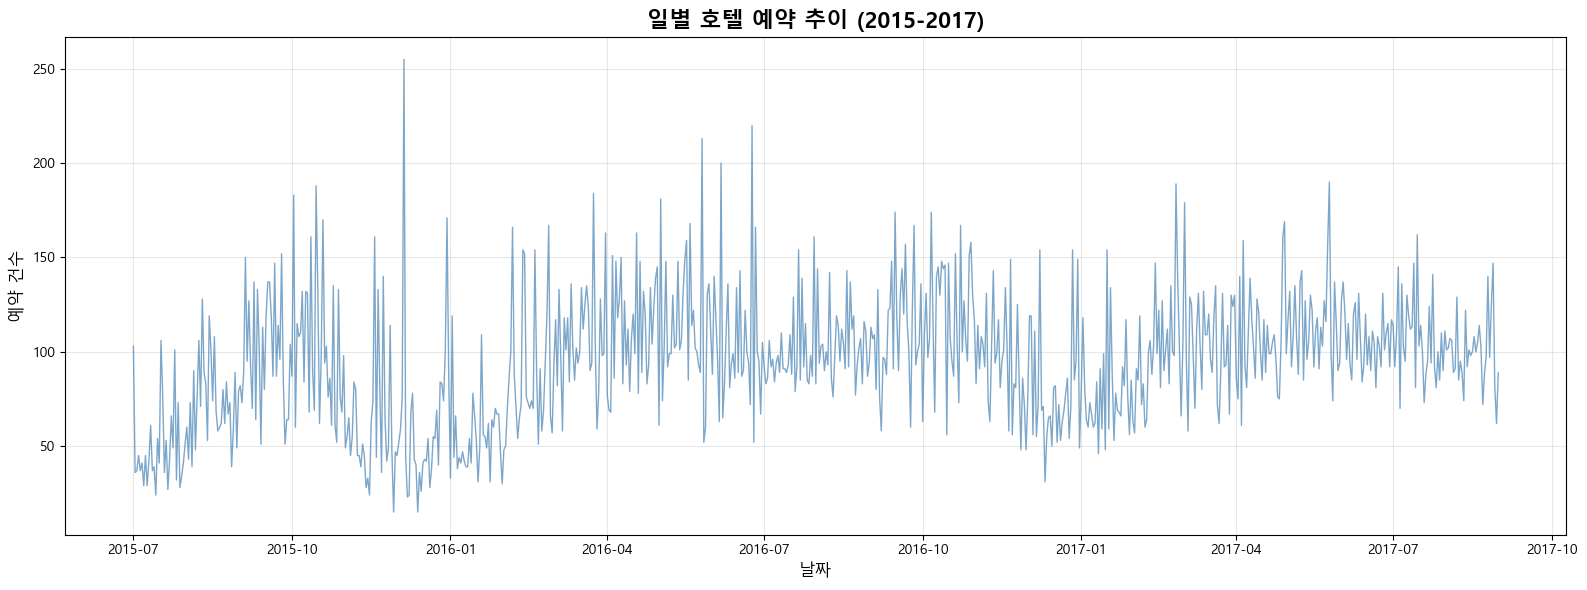

In [11]:
# 일별 추이 시각화
plt.figure(figsize=(16, 6))
plt.plot(daily_bookings['date'], daily_bookings['bookings'], 
         linewidth=1, color='steelblue', alpha=0.7)
plt.title('일별 호텔 예약 추이 (2015-2017)', fontsize=16, fontweight='bold')
plt.xlabel('날짜', fontsize=12)
plt.ylabel('예약 건수', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [12]:
# CSV 저장
daily_bookings.to_csv('../data/daily_bookings.csv', index=False)
print("✅ 전처리 완료! daily_bookings.csv 저장됨")

✅ 전처리 완료! daily_bookings.csv 저장됨
